# Task 3: Cross-Country Comparison

Synthesize the cleaned datasets from Benin, Sierra Leone, and Togo to identify relative solar potential and key differences across countries.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

In [13]:
paths = {
    "Benin":  "../data/benin-malanville_clean.csv",
    "Sierra Leone": "../data/sierraleone-bumbuna_clean.csv",
    "Togo":   "../data/togo-dapaong_qc_clean.csv"
}

# Load into one DataFrame with aCountry column
dfs = []
for country, fp in paths.items():
    df = pd.read_csv(fp, parse_dates=["Timestamp"])
    df["Country"] = country
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)

In [14]:
df_all.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,ModA_z,ModA_outlier,ModB_z,ModB_outlier,WS_z,WS_outlier,WSgust_z,WSgust_outlier,any_outlier,Country
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,...,-0.723749,False,-0.723088,False,-1.322831,False,-1.187312,False,False,Benin
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,...,-0.723749,False,-0.723088,False,-1.322831,False,-1.384442,False,False,Benin
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,...,-0.723749,False,-0.723088,False,-1.135736,False,-0.842334,False,False,Benin
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,...,-0.723749,False,-0.723088,False,-1.198101,False,-1.039464,False,False,Benin
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,...,-0.723749,False,-0.723088,False,-1.260466,False,-1.039464,False,False,Benin


## 1. Metric Comparison

### 1.1 Boxplots of GHI, DNI, DHI by Country


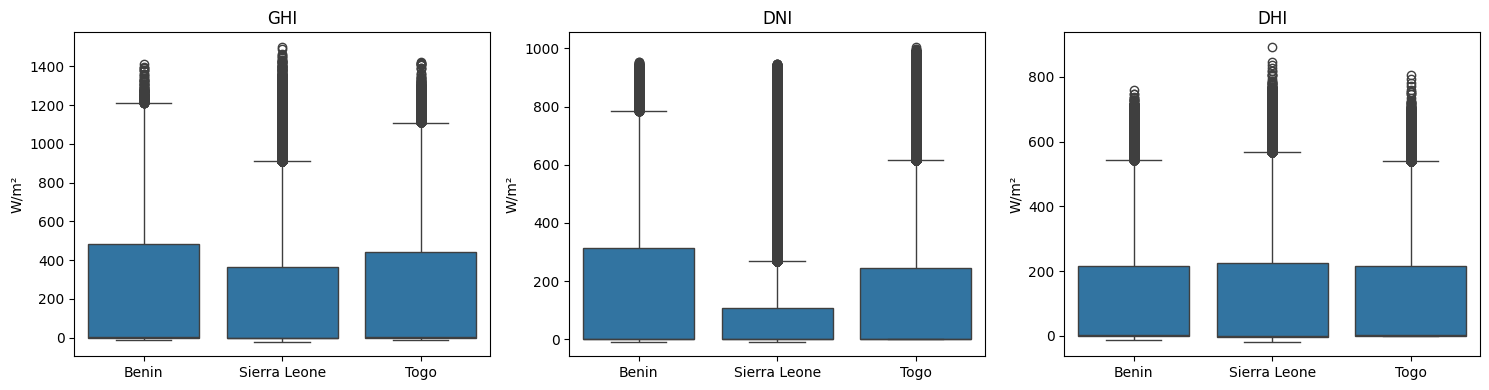

In [15]:
metrics = ["GHI","DNI","DHI"]
plt.figure(figsize=(15,4))
for i, m in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Country", y=m, data=df_all)
    plt.title(m)
    plt.xlabel("")
    plt.ylabel("W/m²")
plt.tight_layout()
plt.show()


### 1.2 Summary Table of mean / median / std

In [16]:
summary = (
    df_all
    .groupby("Country")[metrics]
    .agg(["mean","median","std"])
    .round(2)
)
display(summary)

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

## 2. Statistical Testing

We’ll test whether the mean GHI differs across countries using one-way ANOVA (with Kruskal–Wallis as a nonparametric backup).



In [17]:
groups = [df_all.loc[df_all.Country==c, "GHI"] for c in paths.keys()]

anova_stat, anova_p = f_oneway(*groups)
kw_stat,   kw_p   = kruskal(*groups)

print(f"One-way ANOVA on GHI:    F = {anova_stat:.2f}, p = {anova_p:.3e}")
print(f"Kruskal–Wallis on GHI:   H = {kw_stat:.2f}, p = {kw_p:.3e}")


One-way ANOVA on GHI:    F = 2090.09, p = 0.000e+00
Kruskal–Wallis on GHI:   H = 4524.88, p = 0.000e+00


## Key Observations

- **Benin has the highest overall solar potential**  
  - *Mean GHI*: 240.6 W/m² (vs. 230.6 W/m² in Togo and 202.0 W/m² in Sierra Leone)  
  - *Mean DNI*: 167.2 W/m² (vs. 151.3 W/m² in Togo and 116.4 W/m² in Sierra Leone)  
  - Consistently outperforms the other sites in both global and direct irradiance.

- **Sierra Leone’s cloudier climate yields proportionally more diffuse light**  
  - *Mean DHI*: 218.6 W/m² (closer to Benin’s 261.7 W/m² and Togo’s 250.9 W/m²) despite much lower DNI.  
  - *GHI variability (σ = 298.5 W/m²)* is the lowest, indicating more uniform, but generally lower, irradiance under persistent cloud cover.

- **Inter-country differences are highly significant**  
  - One-way ANOVA on GHI: *F* = 2090.09, *p* < 0.001  
  - Kruskal–Wallis on GHI: *H* = 4524.88, *p* < 0.001  
  - These p-values confirm that each country’s irradiance distribution differs statistically at α = 0.05.


## 4. (Bonus) Bar Chart of Average GHI Ranking

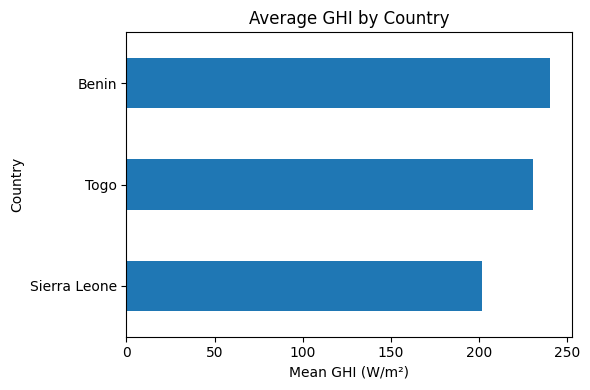

In [18]:
mean_ghi = df_all.groupby("Country")["GHI"].mean().sort_values()
plt.figure(figsize=(6,4))
mean_ghi.plot(kind="barh")
plt.title("Average GHI by Country")
plt.xlabel("Mean GHI (W/m²)")
plt.tight_layout()
plt.show()